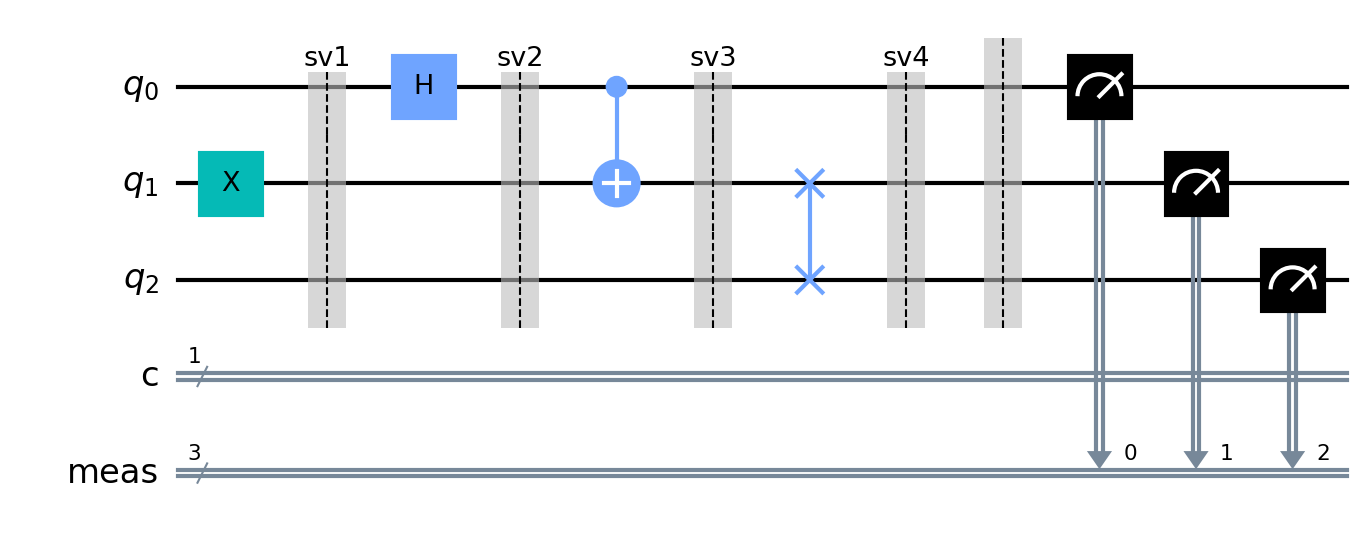

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

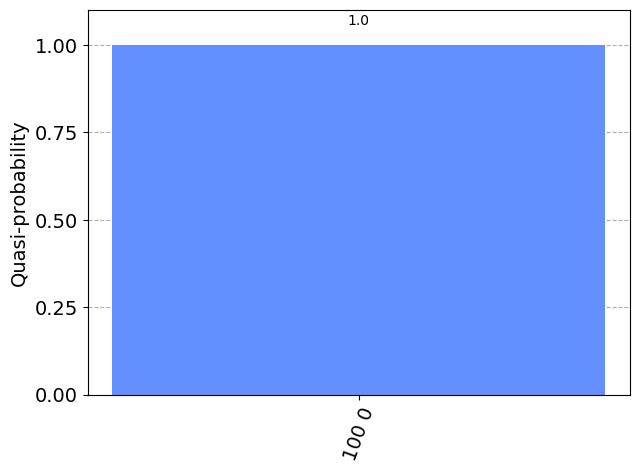

In [15]:
"""quantum_circuit1.ipynb"""

from __future__ import annotations

import typing

import numpy as np
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_state_qsphere  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Cell 1

backend: Any = Aer.get_backend("statevector_simulator")
qc: Any = QuantumCircuit(3, 1)

qc.x(1)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.cx(0, 1)
qc.save_statevector("sv3")
qc.swap(1, 2)
qc.save_statevector("sv4")
qc.measure(1, 0)


# Do not modify the following code
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]
sv2: Any = result.data(0)["sv2"]
sv3: Any = result.data(0)["sv3"]
sv4: Any = result.data(0)["sv4"]

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(as_latex(sv2, prefix=r"\mathbf{Statevector\;2}="))
display(as_latex(sv3, prefix=r"\mathbf{Statevector\;3}="))
display(as_latex(sv4, prefix=r"\mathbf{Statevector\;4}="))

display(plot_distribution(counts))  # type: ignore


In [16]:
# Cell 2

# 1.) The result will either be 001 or 100. This is bc due to the H operator after state vector 1, q1 is in superposition btw 0 and 1. If q0 is 0, it will cause the cx not to operate making q1 a 1 which then swaps with q2 to make 100. If q0 is 1, it will cause the cx to operate making q1 a 0 which then does not swap with q2 to make 001.
# 2.) Because when the swap occurs after state vector 3, either q1 is a 0 in which case the swap does not occur meaning that the final state of q1 will be a 0. In the case that q1 is a 1, then the swap will occur switching q2 to q1. q2 has always been 0 and has had no operators work on it; therefore, it will switch q1 to being 0. Either way, q1 will always end up being 0.
